<a href="https://colab.research.google.com/github/jonaidsharif/Twitter-And-Reddit-Sentiment-Analysis/blob/main/sentiment_reddit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Machine Learning/Twitter and Reddit Sentimental analysis Dataset/Reddit_Data.csv'
data = pd.read_csv(file_path)
data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
#data preprocessing
# Remove duplicate rows
data.drop_duplicates(subset='clean_comment', inplace=True)

# Lowercase conversion
data['clean_comment'] = data['clean_comment'].str.lower()

# Removing special characters
data['clean_comment'] = data['clean_comment'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenization
data['clean_comment'] = data['clean_comment'].apply(lambda x: nltk.word_tokenize(x))

# Removing stopwords
stop_words = set(stopwords.words('english'))
data['clean_comment'] = data['clean_comment'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['clean_comment'] = data['clean_comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back to string
data['clean_comment'] = data['clean_comment'].apply(lambda x: ' '.join(x))

In [6]:
data

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal wrappi...,0
4,benefit may want read living buddha living chr...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


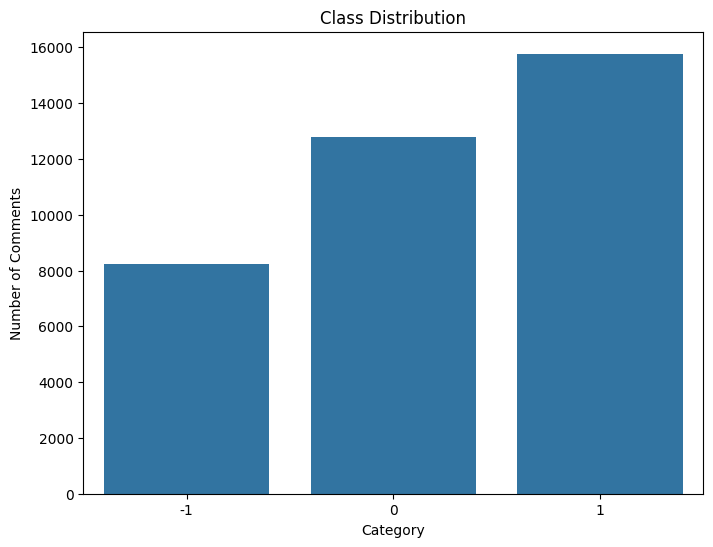

In [7]:
# prompt: Visualization
# Class Distribution:
# Word Frequency:

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.show()

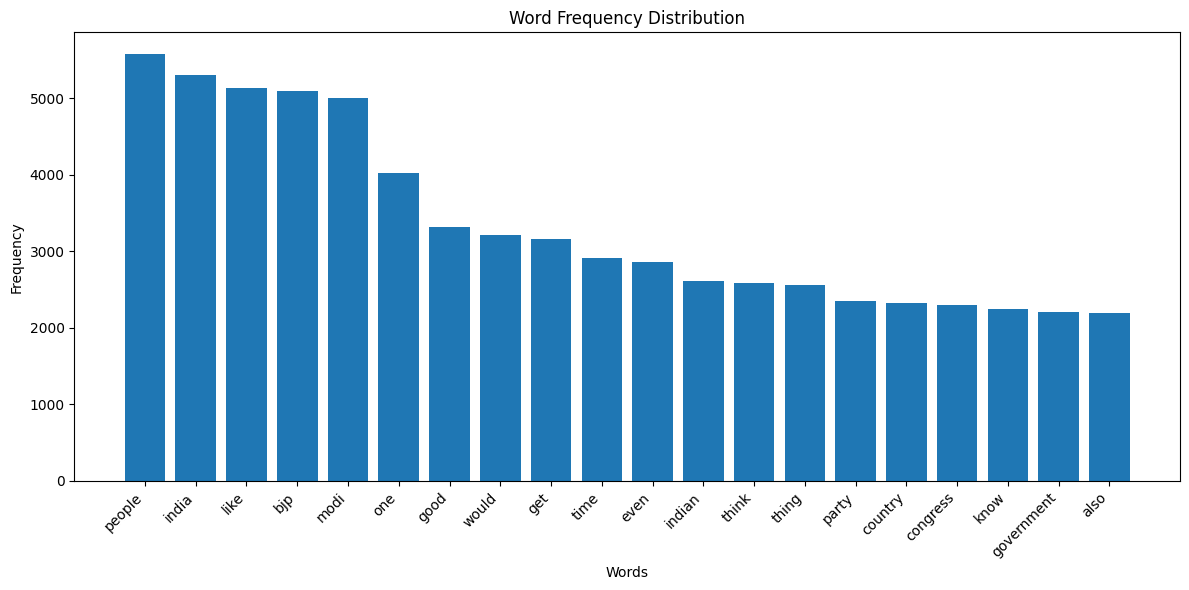

In [8]:
# Word Frequency
all_words = ' '.join(data['clean_comment']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Top 20 most frequent words

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

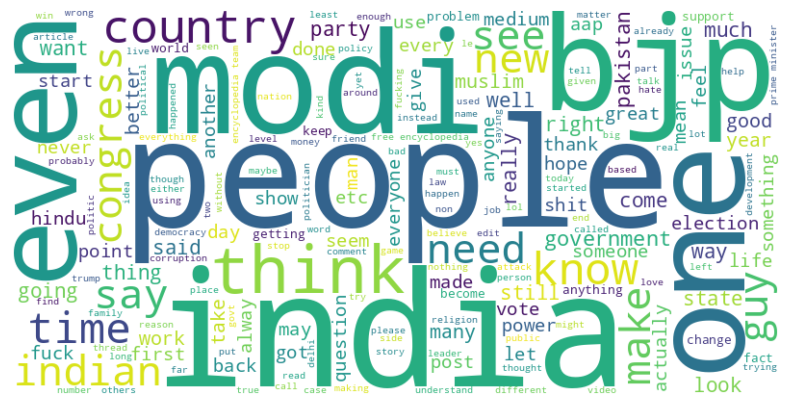

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame and 'clean_comment' column are already defined as in the provided code.

# Join all cleaned comments into a single text
text = " ".join(comment for comment in data.clean_comment)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

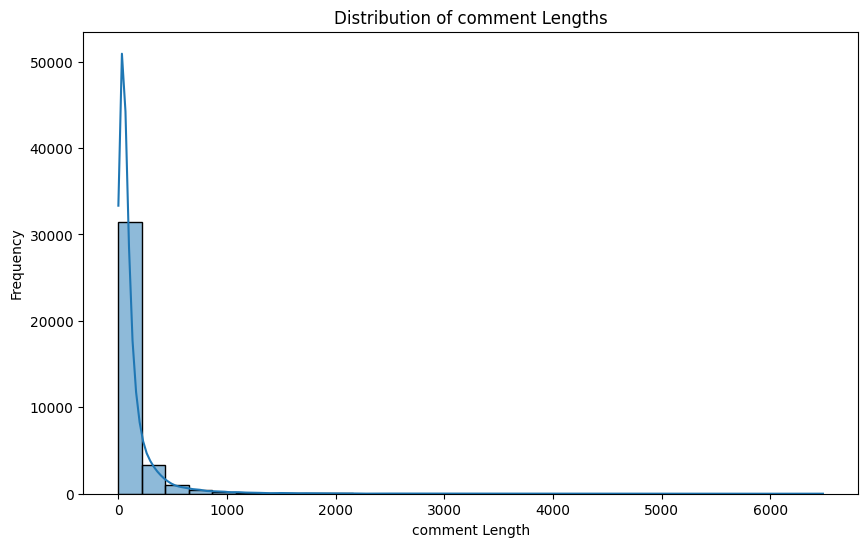

In [10]:
# Calculate comment lengths
data['comment_length'] = data['clean_comment'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['comment_length'], bins=30, kde=True)
plt.title('Distribution of comment Lengths')
plt.xlabel('comment Length')
plt.ylabel('Frequency')
plt.show()

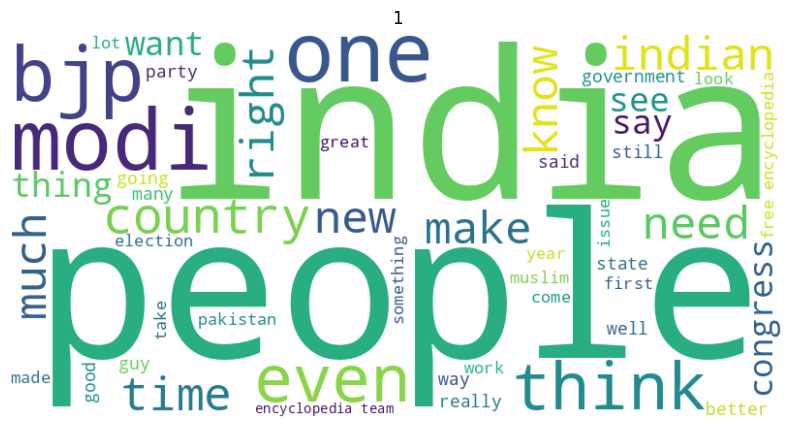

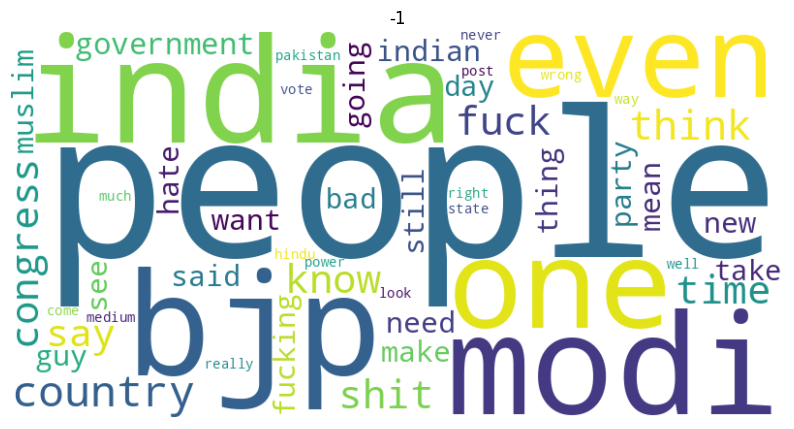

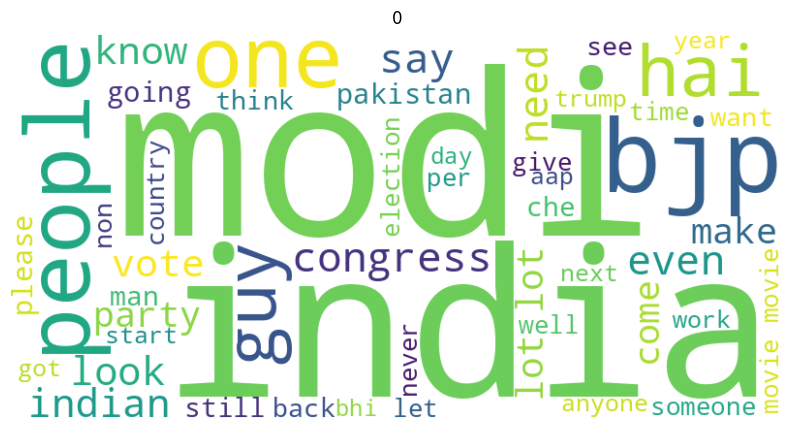

In [11]:
# Get unique categories of comments
categories = data['category'].unique()

# Create a word cloud for each category, each in its own figure
for category in categories:
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
    subset = data[data['category'] == category]
    text = " ".join(comment for comment in subset.clean_comment)
    wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category)
    plt.show()  # This will display the figure immediately

In [13]:
# prompt: Word2Vec Model Training

from gensim.models import Word2Vec

# Prepare the data for Word2Vec
sentences = [comment.split() for comment in data['clean_comment']]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Example usage: Get the vector representation of a word
vector = model.wv['example']  # Replace 'example' with any word from your vocabulary
print(vector)


# Find similar words
similar_words = model.wv.most_similar('example', topn=10) # Replace 'example' with any word from your vocabulary
similar_words

[-0.6305951   0.6027488  -0.0371654   0.4832794  -0.08731144 -1.0832936
  0.33868656  1.2473012  -0.12234503 -0.5950364  -0.28149372 -0.7233308
  0.28132933 -0.11502555  0.5047507  -0.9524535   0.5072243  -0.74417704
  0.17532693 -0.77899396  0.5827955   0.5515228   0.46567845 -0.27137485
 -0.15094252  0.1797923  -1.0036802  -0.29809335 -0.32761967 -0.12481779
  0.53979707  0.13526149 -0.09198757 -0.5636251  -0.07070979  0.55520654
  0.16674086  0.08353946 -0.27719086 -1.3602308   0.02005511 -0.55019057
 -0.63412523  0.48356056  0.64766073 -0.14540699 -0.3761315  -0.02257725
  0.65212893  0.82721156  0.23214425 -0.6030136  -0.51381445 -0.05894256
 -0.4339274   0.47927257  0.4567623   0.20838647 -0.6650952   0.17572294
  0.2353281   0.32287025 -0.41987246 -0.22374061 -0.89709204  0.49826205
 -0.43130568  0.5726202  -0.881607    0.5366627  -0.02901621  0.12575375
  0.7766473  -0.2957359   0.23432948  0.37283373  0.13402997 -0.1521681
 -0.28859335  0.5024896  -0.42040166 -0.21716176 -0.36

[('humanity', 0.9898995757102966),
 ('normal', 0.9893765449523926),
 ('similar', 0.9883717894554138),
 ('except', 0.9867127537727356),
 ('surely', 0.9862992763519287),
 ('communism', 0.9861584901809692),
 ('moving', 0.9855408072471619),
 ('simply', 0.9854673743247986),
 ('shitty', 0.9853324294090271),
 ('extremely', 0.9852599501609802)]

In [14]:
# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.save("custom_word2vec.model")

sentiment
positive    14993
neutral     13500
negative     8307
Name: count, dtype: int64


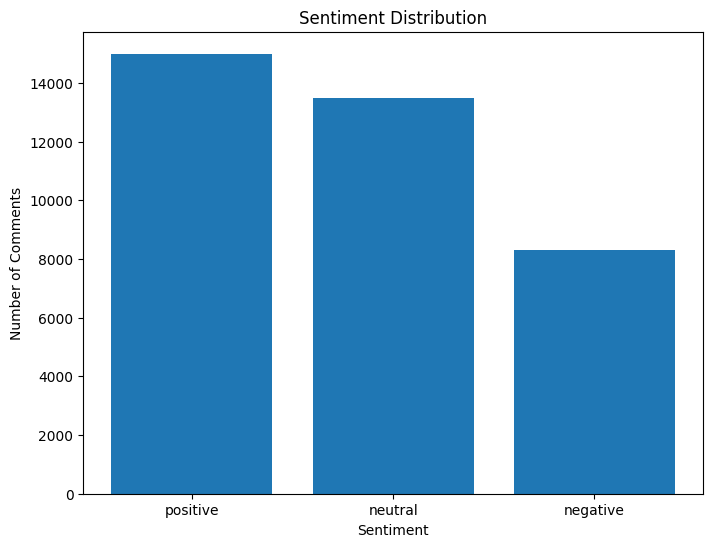

In [15]:
# prompt: sentiment analysis from this dataset

from textblob import TextBlob

# Assuming 'data' DataFrame and 'clean_comment' column are already defined

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'clean_comment' column
data['sentiment_polarity'] = data['clean_comment'].apply(get_sentiment)

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['sentiment_polarity'].apply(classify_sentiment)

# Analyze sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [16]:
# prompt: Detect emotion from this dataset with bert model evaluate model

!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00


In [17]:
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Example usage:
results = classifier(list(data['clean_comment'].head(10))) # analyze the first 10 comments

for result in results:
  print(f"Text: {result['label']}, Sentiment: {result['score']}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Text: POSITIVE, Sentiment: 0.9708511233329773
Text: NEGATIVE, Sentiment: 0.9554560780525208
Text: NEGATIVE, Sentiment: 0.6552397012710571
Text: NEGATIVE, Sentiment: 0.7424430847167969
Text: NEGATIVE, Sentiment: 0.9878675937652588
Text: NEGATIVE, Sentiment: 0.9806283712387085
Text: POSITIVE, Sentiment: 0.7500230669975281
Text: POSITIVE, Sentiment: 0.8318896293640137
Text: NEGATIVE, Sentiment: 0.8189752697944641
Text: NEGATIVE, Sentiment: 0.8753660321235657
